In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("bank-additional-full_final (3).csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [22]:
"""EDA
1)remove null values, find outliers, find dupllicates, label encoding
2)if null values are greather than 30%, then-->
    fill mean when dealing with continous values,
    fill median when dealing with column in which the values are in order(ascending/descending)
    fill mode when dealing with categorical values
    3)else drop the values"""
"""for col in df.columns:
    if df[col]!='object':
        df[col].fillna(df[col].mean, inplace=True) #when data is not categorical
        df[col].fillna(df[col].mode, inplace=True) #when data is categorical"""

In [50]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col].fillna(df[col].mode()[0], inplace=True) #when data is categorical

C:\Users\rgsaa\AppData\Local\Temp\ipykernel_8372\2465838132.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True) #when data is categorical


In [52]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [54]:
df.duplicated().sum()

0

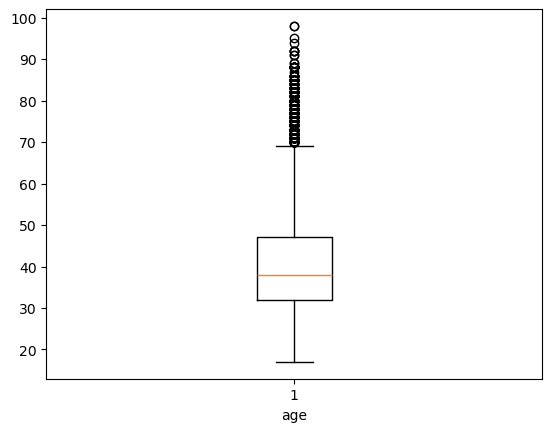

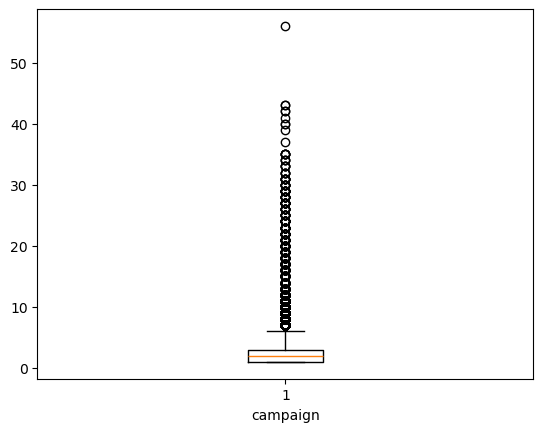

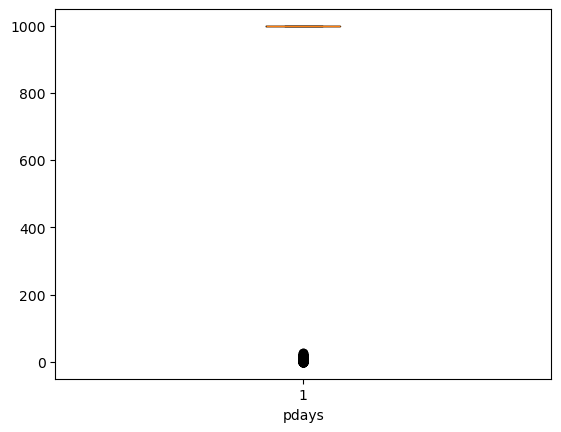

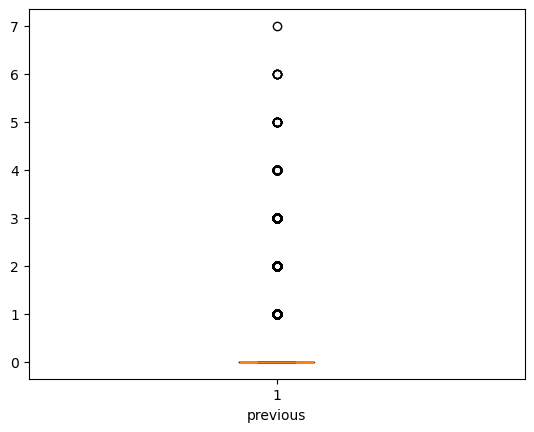

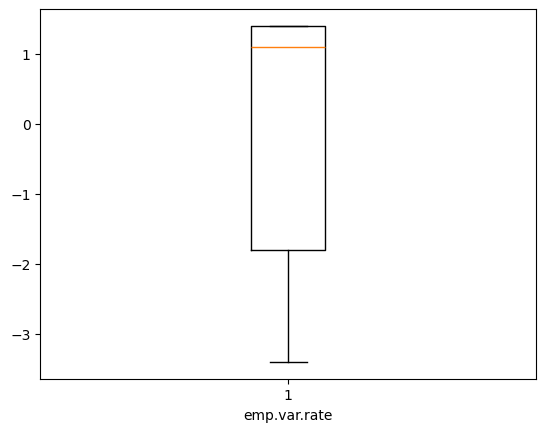

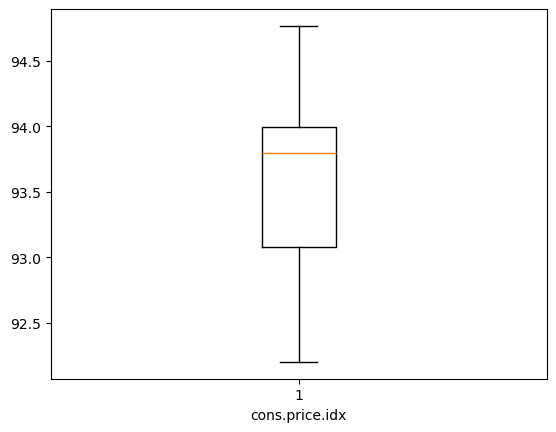

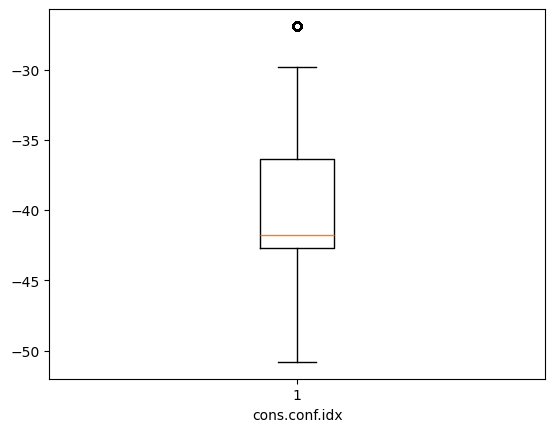

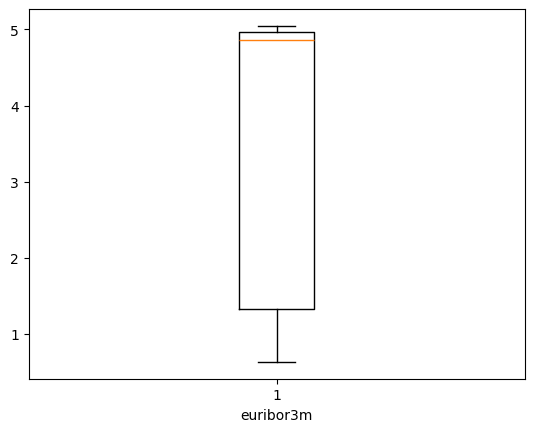

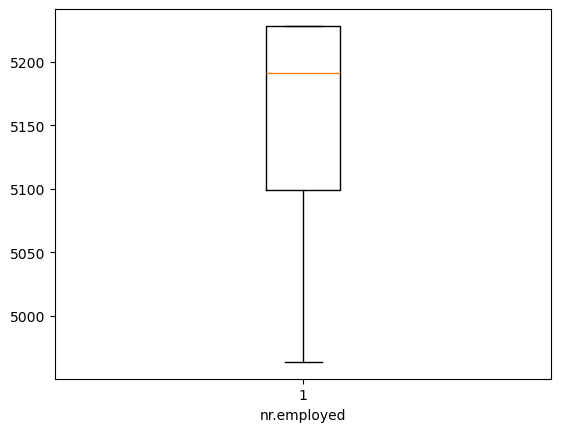

In [56]:
for col in df.columns:
    if df[col].dtype!='object':
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [62]:
df['pdays'].value_counts()

pdays
999    37890
3        438
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [64]:
df['previous'].value_counts()

previous
0    33858
1     4484
2      752
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [80]:
out_col=['age','campaign','cons.conf.idx']

for col in out_col:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR

    df=df[(df[col]<=ub) & (df[col]>=lb)]

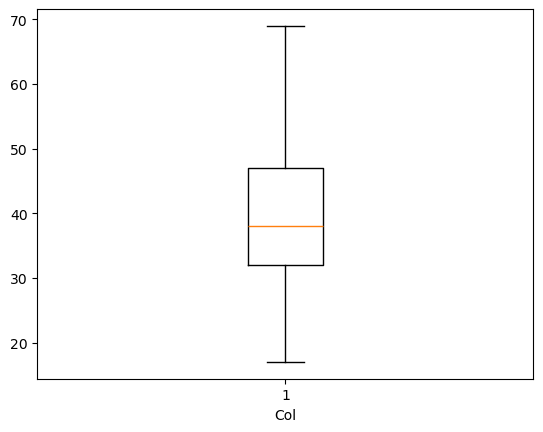

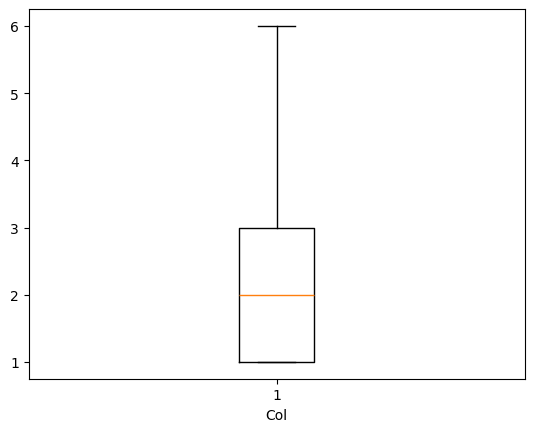

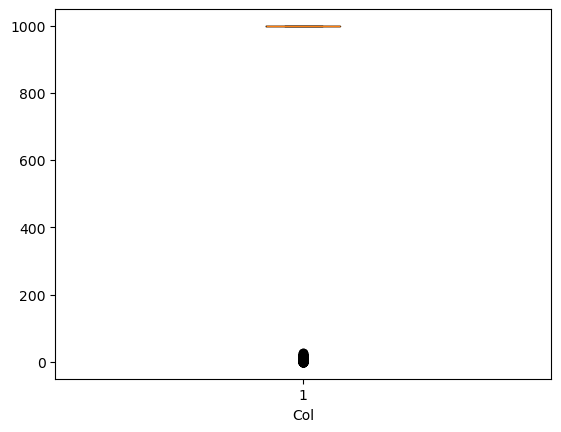

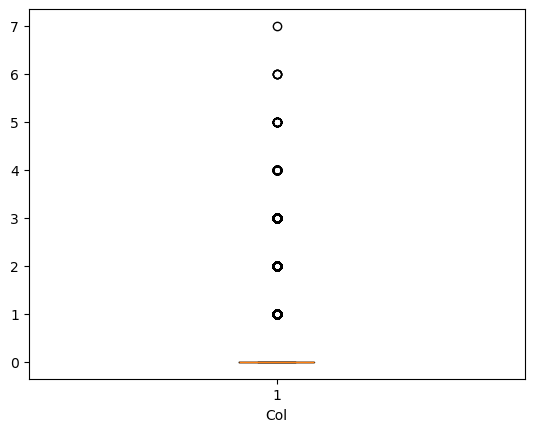

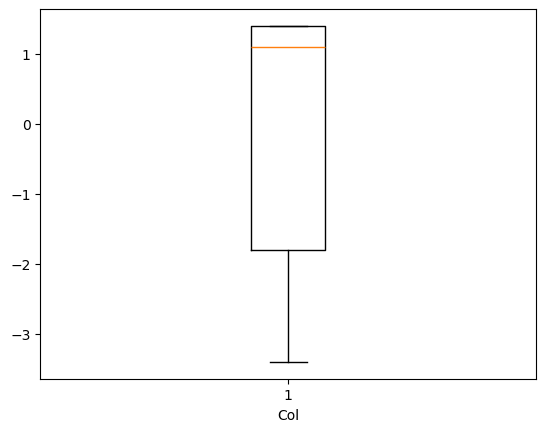

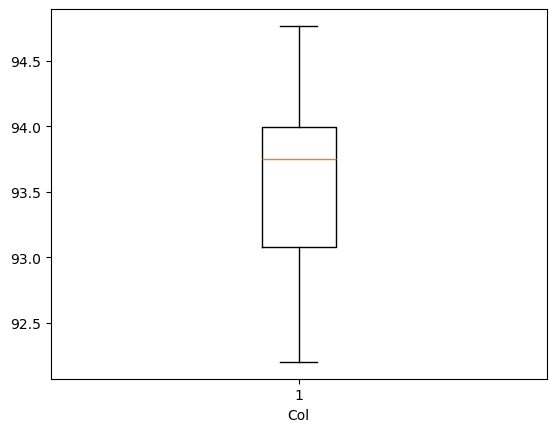

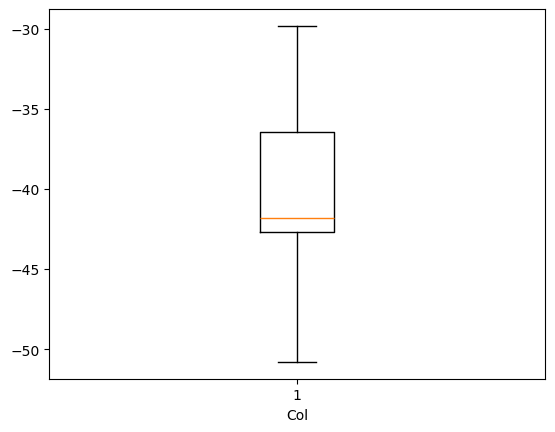

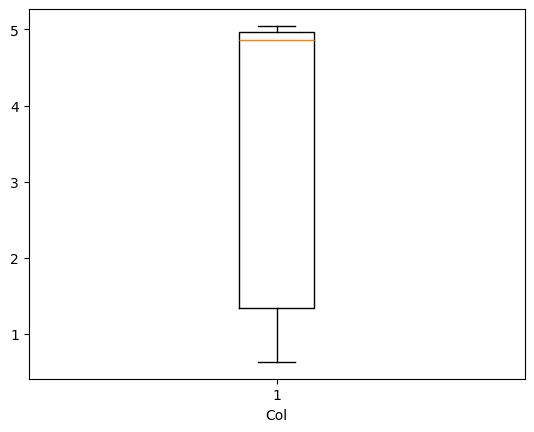

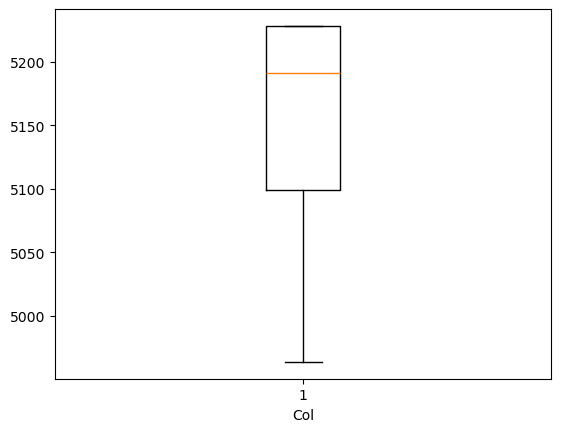

In [82]:
for col in df.columns:
    if(df[col].dtype!='object'):
        plt.boxplot(df[col])
        plt.xlabel("Col")
        plt.show()

In [84]:
df.shape

(36178, 20)

In [ ]:
"""label encoding- convert each category to unique integer
use when: the categories are ordinal(have order) high school, btech, mtech,phd
one-hot encoding- create a binary columns for each category (0-1)
use when: Nominal (non-ordered ) categories
ordinal encoding(ordered categorical values): similar to label encoding but you decide the order"""

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
  if(df[col].dtype == 'object'):
    df[col] = le.fit_transform(df[col])

In [98]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,10,2,0,0,2,0,0,7,0,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
#One-Hot encoding

In [120]:
data=pd.DataFrame({'color':['red','blue','green','yellow','red']})
oh=pd.get_dummies(data, columns=['color'], drop_first=False)

In [122]:
oh

,color_blue,color_green,color_red,color_yellow
0,False,False,True,False
1,True,False,False,False
2,False,True,False,False
3,False,False,False,True
4,False,False,True,False


In [126]:
#Ordinal encoding

In [128]:
from sklearn.preprocessing import OrdinalEncoder

new_data = pd.DataFrame({
    'education':['high school','bachelor','masters','phd']
})


order = [['high school','bachelor','masters','phd']]

encoder = OrdinalEncoder(categories = order)


new_data['education_encoded'] = encoder.fit_transform(new_data[['education']])

print(new_data)

     education  education_encoded
0  high school                0.0
1     bachelor                1.0
2      masters                2.0
3          phd                3.0
